# Your first convolutional neural network

# imports

In [6]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation, ReLU
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [7]:
input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(
    filters=10,
    kernel_size=(4, 4),
    strides=2,
    padding='same'
)(input_layer)
activation_1 = ReLU()(conv_layer_1)

conv_layer_2 = Conv2D(
    filters=20,
    kernel_size=(3, 3),
    strides=2,
    padding='same'
)(activation_1)
activation_2 = ReLU()(conv_layer_2)

flatten_layer = Flatten()(activation_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 re_lu (ReLU)                (None, 16, 16, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 20)          0         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810 

In [15]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

# train

In [17]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5002 - accuracy: 0.4707 - val_loss: 1.2706 - val_accuracy: 0.5511
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1098 - accuracy: 0.6115 - val_loss: 1.1104 - val_accuracy: 0.6018
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9783 - accuracy: 0.6572 - val_loss: 1.0346 - val_accuracy: 0.6422
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8960 - accuracy: 0.6892 - val_loss: 0.9063 - val_accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8423 - accuracy: 0.7058 - val_loss: 0.8468 - val_accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7985 - accuracy: 0.7214 - val_loss: 0.8026 - val_accuracy: 0.7231
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7439 - accuracy: 0.7400 - val_loss: 0.9597 -

In [21]:
model.layers[1].get_weights()

[array([[[[ 2.32461914e-01,  1.21428393e-01,  1.34481966e-01,
            1.50225818e-01, -2.65490860e-01, -9.09675658e-02,
           -3.34113002e-01,  2.21604273e-01,  1.99558690e-01,
           -7.25264400e-02,  1.39270455e-01, -2.83918399e-02,
           -1.38924778e-01,  1.90871045e-01,  1.94865853e-01,
           -9.45109315e-03, -2.87346337e-02, -1.75475687e-01,
            9.45059136e-02,  2.10081622e-01, -1.50366008e-01,
           -4.37241420e-02,  2.32718959e-01,  1.36211276e-01,
            5.85512668e-02, -8.19248706e-02,  2.20189750e-01,
           -1.27811417e-01,  1.14741057e-01, -1.52037695e-01,
            3.44689153e-02,  2.13174328e-01],
          [ 1.56639948e-01,  6.80426657e-02,  8.65233690e-02,
            2.16675550e-01, -3.74817252e-01,  2.13692278e-01,
            9.35805216e-02,  1.64599463e-01,  2.95011979e-03,
           -2.31014147e-01, -2.13259943e-02,  1.68459155e-02,
           -1.61948174e-01,  2.08307952e-01,  1.96606874e-01,
           -2.00256199e-

# analysis

In [22]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 137ms/step - loss: 0.7783 - accuracy: 0.7367


[0.7782948613166809, 0.7366999983787537]

In [23]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 7ms/step


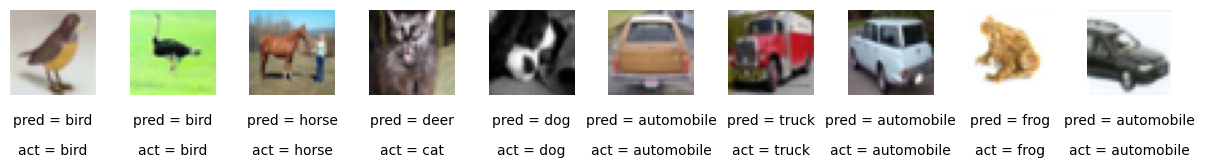

In [24]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
